Import Library

In [402]:
import os
import cv2
import numpy as np
from tabulate import tabulate
from skimage.feature import graycomatrix, graycoprops

Directory

In [403]:
image_directory_training="../Dataset/Raw/5_Label/DataSet_Training"
image_directory_testing="../Dataset/Raw/5_Label/DataSet_Testing"

Ekstraksi Fitur RGB

In [404]:
def ef_rgb_training(image_directory_training):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_training = []
    
  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]
    

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format RGB
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # mengambil nilai red (R) dari gambar
      red = rgb[:, :, 0]

      # mengambil nilai green (G) dari gambar
      green = rgb[:, :, 1]

      # mengambil nilai blue (B) dari gambar
      blue = rgb[:, :, 2]
      
      # menambahkan nilai RGB ke dalam list
      features_training.append([np.mean(red), np.mean(green), np.mean(blue), a])
                
  return features_training


def ef_rgb_testing(image_directory_testing):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_testing = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format RGB
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # mengambil nilai red (R) dari gambar
      red = rgb[:, :, 0]

      # mengambil nilai green (G) dari gambar
      green = rgb[:, :, 1]

      # mengambil nilai blue (B) dari gambar
      blue = rgb[:, :, 2]

      # menambahkan nilai RGB ke dalam list
      features_testing.append(
          [np.mean(red), np.mean(green), np.mean(blue), a])

  return features_testing

Ekstraksi Fitur HSV

In [405]:
def ef_hsv_training(image_directory_training):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_training = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format HSV
      hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

      # mengambil nilai hue (H) dari gambar
      hue = hsv[:, :, 0]

      # mengambil nilai saturation (S) dari gambar
      saturation = hsv[:, :, 1]

      # mengambil nilai value (V) dari gambar
      value = hsv[:, :, 2]

      # menambahkan nilai HSV ke dalam list
      features_training.append(
          [np.mean(hue), np.mean(saturation), np.mean(value), a])

  return features_training


def ef_hsv_testing(image_directory_testing):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_testing = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format HSV
      hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

      # mengambil nilai hue (H) dari gambar
      hue = hsv[:, :, 0]

      # mengambil nilai saturation (S) dari gambar
      saturation = hsv[:, :, 1]

      # mengambil nilai value (V) dari gambar
      value = hsv[:, :, 2]

      # menambahkan nilai HSV ke dalam list
      features_testing.append(
          [np.mean(hue), np.mean(saturation), np.mean(value), a])

  return features_testing

GLCM Atribut

In [406]:
#scenario GLCM properties
glcm_properties_1 = ['dissimilarity', 'correlation', 'homogeneity']
angles = [0, 45, 90, 135]

Ekstraksi Fitur RGB + GLCM

In [407]:
def ef_rgb_glcm_training(image_directory_training):

    # membuat list untuk menyimpan hasil ekstraksi fitur
    features_training = []

    # melakukan ekstraksi fitur pada setiap folder
    for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

        # mengambil semua file gambar di dalam folder
        image_files = [f for f in files if f.endswith('.jpg')]

        # melakukan ekstraksi fitur pada setiap gambar
        for image_file in image_files:
            # membaca gambar
            image = cv2.imread(os.path.join(root, image_file))

            # mengubah gambar ke dalam format RGB
            rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # mengambil nilai red (R) dari gambar
            red = rgb[:, :, 0]

            # mengambil nilai green (G) dari gambar
            green = rgb[:, :, 1]

            # mengambil nilai blue (B) dari gambar
            blue = rgb[:, :, 2]
            
            # Hitung matriks glcm
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, distances=[5], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],levels=256, symmetric=True, normed=True)
            
            # Hitung fitur glcm
            feature_glcm = []
            glcm_props = [
                propery for name in glcm_properties_1 for propery in graycoprops(glcm, name)[0]]
            for item in glcm_props:
                feature_glcm.append(item)

            #menambahkan semua fitur ke list
            features_training.append([np.mean(red), np.mean(green), np.mean(blue)] + feature_glcm + [a])
            
    return features_training


def ef_rgb_glcm_testing(image_directory_testing):

    # membuat list untuk menyimpan hasil ekstraksi fitur
    features_testing = []

    # melakukan ekstraksi fitur pada setiap folder
    for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

        # mengambil semua file gambar di dalam folder
        image_files = [f for f in files if f.endswith('.jpg')]

        # melakukan ekstraksi fitur pada setiap gambar
        for image_file in image_files:
            # membaca gambar
            image = cv2.imread(os.path.join(root, image_file))

            # mengubah gambar ke dalam format RGB
            rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # mengambil nilai red (R) dari gambar
            red = rgb[:, :, 0]

            # mengambil nilai green (G) dari gambar
            green = rgb[:, :, 1]

            # mengambil nilai blue (B) dari gambar
            blue = rgb[:, :, 2]
            
            # Hitung matriks glcm
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, distances=[5], angles=[
                                0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

            # Hitung fitur glcm
            feature_glcm = []
            glcm_props = [
                propery for name in glcm_properties_1 for propery in graycoprops(glcm, name)[0]]
            for item in glcm_props:
                feature_glcm.append(item)

            #menambahkan semua fitur ke list
            features_testing.append([np.mean(red), np.mean(
                green), np.mean(blue)] + feature_glcm + [a])

    return features_testing


Ekstraksi Fitur HSV + GLCM

In [408]:
def ef_hsv_glcm_training(image_directory_training):

    # membuat list untuk menyimpan hasil ekstraksi fitur
    features_training = []

    # melakukan ekstraksi fitur pada setiap folder
    for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

        # mengambil semua file gambar di dalam folder
        image_files = [f for f in files if f.endswith('.jpg')]

        # melakukan ekstraksi fitur pada setiap gambar
        for image_file in image_files:
            # membaca gambar
            image = cv2.imread(os.path.join(root, image_file))

            # mengubah gambar ke dalam format HSV
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

            # mengambil nilai hue (H) dari gambar
            hue = hsv[:, :, 0]

            # mengambil nilai saturation (S) dari gambar
            saturation = hsv[:, :, 1]

            # mengambil nilai value (V) dari gambar
            value = hsv[:, :, 2]

            # Hitung matriks glcm
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, distances=[5], angles=[
                                0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

            # Hitung fitur glcm
            feature_glcm = []
            glcm_props = [
                propery for name in glcm_properties_1 for propery in graycoprops(glcm, name)[0]]
            for item in glcm_props:
                feature_glcm.append(item)

            #menambahkan semua fitur ke list
            features_training.append([np.mean(hue), np.mean(
                saturation), np.mean(value)] + feature_glcm + [a])

    return features_training


def ef_hsv_glcm_testing(image_directory_testing):

    # membuat list untuk menyimpan hasil ekstraksi fitur
    features_testing = []

    # melakukan ekstraksi fitur pada setiap folder
    for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

        # mengambil semua file gambar di dalam folder
        image_files = [f for f in files if f.endswith('.jpg')]

        # melakukan ekstraksi fitur pada setiap gambar
        for image_file in image_files:
            # membaca gambar
            image = cv2.imread(os.path.join(root, image_file))

            # mengubah gambar ke dalam format HSV
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

            # mengambil nilai hue (H) dari gambar
            hue = hsv[:, :, 0]

            # mengambil nilai saturation (S) dari gambar
            saturation = hsv[:, :, 1]

            # mengambil nilai value (V) dari gambar
            value = hsv[:, :, 2]

            # Hitung matriks glcm
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, distances=[5], angles=[
                                0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

            # Hitung fitur glcm
            feature_glcm = []
            glcm_props = [
                propery for name in glcm_properties_1 for propery in graycoprops(glcm, name)[0]]
            for item in glcm_props:
                feature_glcm.append(item)

            #menambahkan semua fitur ke list
            features_testing.append([np.mean(hue), np.mean(
                saturation), np.mean(value)] + feature_glcm + [a])

    return features_testing


Inisialisasi Data Training

In [409]:
# train_data = ef_rgb_training(image_directory_training)
# train_data = ef_hsv_training(image_directory_training)
# train_data = ef_rgb_glcm_training(image_directory_training)
train_data = ef_hsv_glcm_training(image_directory_training)

# header tabel rgb
# header = ["Red (R)", "Green (G)", "Blue (B)", "Label"]

# header tabel rgb glcm
# header = ["Red (R)", "Green (G)", "Blue (B)"] + [f'{prop} {angle}' for prop in glcm_properties_1 for angle in angles] + ["Label"]

# header tabel hsv
# header = ["Hue (H)", "Saturation (S)", "Value (V)", "Label"]

# header tabel hsv glcm
header = ["Hue (H)", "Saturation (S)", "Value (V)"] + [f'{prop} {angle}' for prop in glcm_properties_1 for angle in angles] + ["Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+-----------+------------------+-------------+-------------------+--------------------+--------------------+---------------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------+---------+
|   Hue (H) |   Saturation (S) |   Value (V) |   dissimilarity 0 |   dissimilarity 45 |   dissimilarity 90 |   dissimilarity 135 |   correlation 0 |   correlation 45 |   correlation 90 |   correlation 135 |   homogeneity 0 |   homogeneity 45 |   homogeneity 90 |   homogeneity 135 |   Label |
+===========+==================+=============+===================+====================+====================+=====================+=================+==================+==================+===================+=================+==================+==================+===================+=========+
|   80.5703 |         120.305  |     154.955 |           8.0958  |            8.49932 |            8.14571 |             

Inisialisasi Data Testing

In [410]:
# test_data = ef_rgb_testing(image_directory_testing)
# test_data = ef_hsv_testing(image_directory_testing)
# test_data = ef_rgb_glcm_testing(image_directory_testing)
test_data = ef_hsv_glcm_testing(image_directory_testing)

# header tabel rgb
# header = ["Red (R)", "Green (G)", "Blue (B)", "Label"]

# header tabel rgb glcm
# header = ["Red (R)", "Green (G)", "Blue (B)"] + [f'{prop} {angle}' for prop in glcm_properties_1 for angle in angles] + ["Label"]

# header tabel hsv
# header = ["Hue (H)", "Saturation (S)", "Value (V)", "Label"]

# header tabel hsv glcm
header = ["Hue (H)", "Saturation (S)", "Value (V)"] + [f'{prop} {angle}' for prop in glcm_properties_1 for angle in angles] + ["Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))


+-----------+------------------+-------------+-------------------+--------------------+--------------------+---------------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+------------------+-------------------+---------+
|   Hue (H) |   Saturation (S) |   Value (V) |   dissimilarity 0 |   dissimilarity 45 |   dissimilarity 90 |   dissimilarity 135 |   correlation 0 |   correlation 45 |   correlation 90 |   correlation 135 |   homogeneity 0 |   homogeneity 45 |   homogeneity 90 |   homogeneity 135 |   Label |
+===========+==================+=============+===================+====================+====================+=====================+=================+==================+==================+===================+=================+==================+==================+===================+=========+
|   81.3374 |         126.304  |     145.209 |           7.87915 |            8.29405 |            7.81967 |             

Klasifikasi Model Naive Bayes

In [411]:
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data ]

In [412]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [413]:
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [414]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 3, 3, 2, 2, 2, 5, 3, 3, 3, 3, 4, 4, 4, 1, 5, 5, 5, 3])

In [415]:
# Menggabungkan data uji dan hasil prediksi
result_table = [[data[0], data[1], data[2], pred]
                for data, pred in zip(test_data, y_pred)]

# Membuat header tabel
header = ["Red (R)", "Green (G)", "Blue (B)", "Predicted Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))


+-----------+-------------+------------+-------------------+
|   Red (R) |   Green (G) |   Blue (B) |   Predicted Label |
+===========+=============+============+===================+
|   81.3374 |    126.304  |    145.209 |                 1 |
+-----------+-------------+------------+-------------------+
|   83.7785 |    130.729  |    141.368 |                 1 |
+-----------+-------------+------------+-------------------+
|   86.8251 |     89.27   |    160.118 |                 3 |
+-----------+-------------+------------+-------------------+
|   86.8664 |     88.5364 |    145.673 |                 3 |
+-----------+-------------+------------+-------------------+
|   96.2229 |    112.547  |    179.97  |                 2 |
+-----------+-------------+------------+-------------------+
|   89.5912 |    122.983  |    182.47  |                 2 |
+-----------+-------------+------------+-------------------+
|   96.0424 |    103.192  |    178.293 |                 2 |
+-----------+-----------

In [416]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       1.00      0.75      0.86         4
           3       0.57      1.00      0.73         4
           4       1.00      0.75      0.86         4
           5       0.75      0.75      0.75         4

    accuracy                           0.75        20
   macro avg       0.80      0.75      0.75        20
weighted avg       0.80      0.75      0.75        20



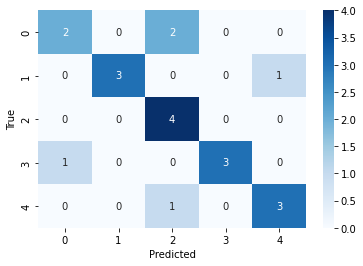

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [418]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75
